In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [40]:
df = pd.read_csv("T:\GIT HUB PROJECTS\HOUSE PRICE(LINEAR)\Housing.csv")

In [41]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [42]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [43]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [44]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [45]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [56]:
correlation = df.corr()

In [57]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Axes: >

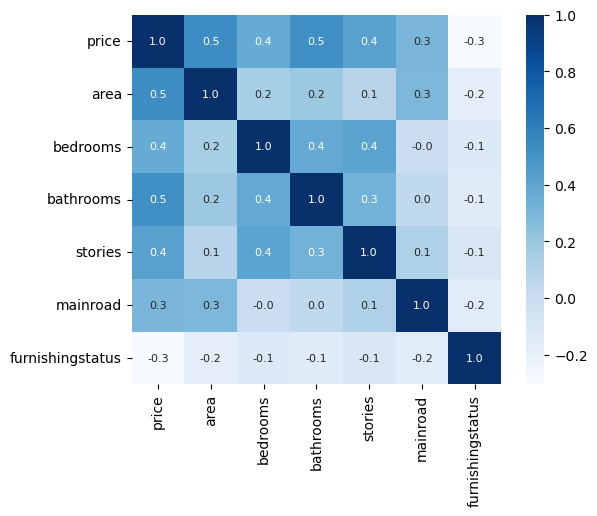

In [58]:
sns.heatmap(correlation , cbar=True, square = True, fmt= '.1f' , annot =True, annot_kws ={'size':8}, cmap ='Blues')

In [49]:
df.drop(['guestroom','basement','airconditioning','parking','prefarea','hotwaterheating'],axis =1 ,inplace =True)

In [50]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus
0,13300000,7420,4,2,3,yes,furnished
1,12250000,8960,4,4,4,yes,furnished
2,12250000,9960,3,2,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,furnished
4,11410000,7420,4,1,2,yes,furnished
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,unfurnished
541,1767150,2400,3,1,1,no,semi-furnished
542,1750000,3620,2,1,1,yes,unfurnished
543,1750000,2910,3,1,1,no,furnished


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
label_encode = LabelEncoder()

In [53]:
label1= label_encode.fit_transform(df.mainroad)
label2 =label_encode.fit_transform(df.furnishingstatus)

In [54]:
df['mainroad'] =label1
df['furnishingstatus'] = label2

In [55]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus
0,13300000,7420,4,2,3,1,0
1,12250000,8960,4,4,4,1,0
2,12250000,9960,3,2,2,1,1
3,12215000,7500,4,2,2,1,0
4,11410000,7420,4,1,2,1,0
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,2
541,1767150,2400,3,1,1,0,1
542,1750000,3620,2,1,1,1,2
543,1750000,2910,3,1,1,0,0


In [59]:
x=df.drop(columns ='price',axis =1)

In [61]:
y=df['price']

In [62]:
x

,area,bedrooms,bathrooms,stories,mainroad,furnishingstatus
0,7420,4,2,3,1,0
1,8960,4,4,4,1,0
2,9960,3,2,2,1,1
3,7500,4,2,2,1,0
4,7420,4,1,2,1,0
...,...,...,...,...,...,...
540,3000,2,1,1,1,2
541,2400,3,1,1,0,1
542,3620,2,1,1,1,2
543,2910,3,1,1,0,0


In [63]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [66]:
df['price'].value_counts()

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64

In [67]:
df.shape

(545, 7)

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =2)

In [79]:
sc = StandardScaler()

In [80]:
x_train =sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [81]:
x_test

array([[-0.98672347,  0.10141207, -0.52339781,  0.32899363,  0.38388595,
        -0.08477534],
       [-0.65518355,  0.10141207, -0.52339781,  0.32899363,  0.38388595,
        -0.08477534],
       [-0.58102331, -1.1268008 , -0.52339781, -0.90756863, -2.60494036,
         1.23529782],
       [-0.70753196, -1.1268008 , -0.52339781, -0.90756863,  0.38388595,
        -0.08477534],
       [ 0.36561041,  0.10141207, -0.52339781,  1.56555589,  0.38388595,
        -0.08477534],
       [ 0.91090633, -1.1268008 , -0.52339781, -0.90756863,  0.38388595,
        -0.08477534],
       [-0.20149735,  0.10141207, -0.52339781, -0.90756863,  0.38388595,
         1.23529782],
       [-0.83404061,  0.10141207, -0.52339781,  0.32899363,  0.38388595,
         1.23529782],
       [-0.90601967, -1.1268008 , -0.52339781, -0.90756863,  0.38388595,
        -1.4048485 ],
       [ 0.94318784,  0.10141207, -0.52339781, -0.90756863, -2.60494036,
         1.23529782],
       [ 0.47903196, -1.1268008 , -0.52339781,  0.

In [82]:
x_train

array([[-1.17687206,  0.03201512, -0.58376171,  0.20075855,  0.41097543,
         1.21990719],
       [ 1.23991283, -1.36384432, -0.58376171, -0.93600416,  0.41097543,
        -1.40665841],
       [-0.90755979, -1.36384432, -0.58376171, -0.93600416,  0.41097543,
         1.21990719],
       ...,
       [-0.54457369,  0.03201512, -0.58376171, -0.93600416,  0.41097543,
        -1.40665841],
       [-1.53938979, -1.36384432, -0.58376171, -0.93600416, -2.43323548,
        -0.09337561],
       [-0.40406294,  1.42787457, -0.58376171,  0.20075855,  0.41097543,
        -1.40665841]])

In [83]:
linear_model = LinearRegression()

In [84]:
y_train


412    3430000
284    4270000
504    2653000
209    4900000
269    4375000
        ...   
299    4200000
534    2100000
493    2800000
527    2275000
168    5250000
Name: price, Length: 436, dtype: int64

In [85]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [87]:
training = linear_model.predict(x_train)

In [97]:
training1 = linear_model.predict(x_test)

In [96]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, training)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 895440.8025684312


In [98]:
mae2 = mean_absolute_error(y_test, training1)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 895440.8025684312
